## Heath Thompson


### Homewoke 1: Sigmoid, KL and cross-entropy

Add your code to the following sections:

```python
    # (1) add your code here
    #-----------------------

    #---------------------------------
```


Grading details:
1. sigm. 20 pts. 
Students can use both the math.exp and np.exp functions. Give 5 extra points to students who can solve the overflow warning.
    
2. dsigm. 20 pts

3. show the sigm and dsigm curves. 10pts

4. kl.  20 pts
Student should consider zero values in p and/or q. If not, reduce 5 points.

4. cross-entropy. 30 pts
students should take care of zeros in q, e.g., using np.clip(). If not reduce 5 points.


### Common issues:
1. Overflow warning of the np.exp(-x) function
2. Didn't deal with 0 in KL divergence
3. Didn't deal with 0 in cross-entropy

sigmoid(0): 0.5
sigmoid(10^(6)): 1.0
sigmoid(-10^(6)): 0.0
derivative of sigmoid(0): 0.25
derivative of sigmoid(10^(6)): 0.0
derivative of sigmoid(-10^(6)): nan


<ipython-input-39-b664cbbb6b16>:18: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-39-b664cbbb6b16>:35: RuntimeWarning: overflow encountered in exp
  return np.exp(-x)/((1+np.exp(-x))**2)
<ipython-input-39-b664cbbb6b16>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-x)/((1+np.exp(-x))**2)


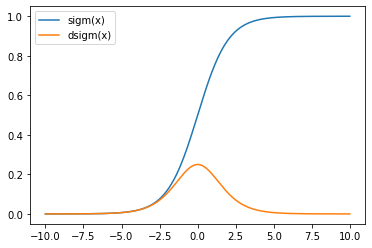

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigm(x):
    """The logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays
    """  
    
    # (1) add your code here 
    #sigm should be able to deal with scalars and vectors
    #-----------------------
    
    #return the output of the sigmoid function
    return 1/(1+np.exp(-x))

    #---------------------------------

def dsigm(x):
    """The derivative of the logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays   
    """ 
    
    # (2) add your code here
    #dsigm should be able to deal with scalars and vectors
    #-------------------------------
 
    #return the out of the derivative of the sigmoid function
    return np.exp(-x)/((1+np.exp(-x))**2)

    #------------------------------
    
print('sigmoid(0):', sigm(0))
print('sigmoid(10^(6)):', sigm(1e6))
print('sigmoid(-10^(6)):', sigm(-1e6))

print('derivative of sigmoid(0):', dsigm(0))
print('derivative of sigmoid(10^(6)):', dsigm(1e6))
print('derivative of sigmoid(-10^(6)):', dsigm(-1e6))

# (3) add your code here
# show the curves of the sigm and dsigm functions using plt.plot() function
# from -10 to 10
#-----------------------
x = np.arange(-10, 10, 0.01)
y = sigm(x)
y1 = dsigm(x)

plt.plot(x, y, label="sigm(x)") #plot sigm(x) function
plt.plot(x, y1, label="dsigm(x)") #plot dsigm(x) function
plt.legend()             #give descriptions for each line
#-----------------------

In [49]:
# KL divergience
def KL(p, q):
    
    """KL divergence D(P || Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """
    
    # (4) add your code here
    #Avoid the division-by-zero problem
    #-----------------------
    
    KLout = 0.0      #variable to store summation of output in KL
    for i in range(len(p)):
        if(p[i] != 0.0 or q[i] != 0): #skip input that leads to undefined output or an output of 0
            KLout = KLout + p[i]*np.log(p[i]/q[i]) #sum output of KL divergence function
    return KLout
    
    #-----------------------

# test code
p = np.array([0.2, 0.8, 0])
q = np.array([0.1, 0.9, 0])

print(KL(p, q), KL(q, p))

0.04440300758688234 0.036690014034750584


In [44]:
# Cross-entropy
def crossentropy(p, q):
    """The Cross-entropy H(P, Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """  
    
    # (4) add your code here
    # students should take care of zeros in q 
    #-----------------------
    
    q = np.clip(q, 1*np.exp(-12), 1.0)   #round anything less than e^-12 to e^-12
    
    CEout = 0.0       #variable to store summation of CE
    for i in range(len(p)):
        CEout = CEout + p[i]*np.log(q[i])  #sum output of Cross Entropy function

    return -CEout
    
    #-----------------------
    
# test code
p = np.array([0.2, 0.7, 0.1, 0])
q = np.array([0.1, 0.9, 0, 0.1])
print(crossentropy(p, q), crossentropy(q, p))    

1.7342693795592878 1.6819512407882695
